In [1]:
import os, sys

sys.path.append(os.path.abspath(os.path.join("..", "src")))
from pathlib import Path

samples_folder = Path("../../samples")

In [2]:
# This notebook inspect the samples I generated for the 1000 events with 50 pileup AMVF

In [3]:
import uproot
import mplhep as hep
import awkward as ak
import hist
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [4]:
file_path = (
    samples_folder / "sample/n1000_npu50_AMVF/vertex_n1000_npu50_AMVF.root"
)

In [5]:
if file_path.exists():
    file = uproot.open(file_path)
else:
    raise FileNotFoundError(f"{file_path} does not exist")

In [6]:
file.keys()

['ML_tracks;3', 'ML_tracks;2', 'vertexing;1']

In [7]:
file["ML_tracks"].keys()

['event_nr',
 'reco_PriVtxX',
 'reco_PriVtxY',
 'reco_PriVtxZ',
 'truth_PriVtxX',
 'truth_PriVtxY',
 'truth_PriVtxZ',
 'reco_trk_fit_d0',
 'reco_trk_fit_z0',
 'reco_trk_fit_phi',
 'reco_trk_fit_theta',
 'reco_trk_fit_qop',
 'reco_trk_fit_time',
 'reco_trk_fit_err_d0',
 'reco_trk_fit_err_z0',
 'reco_trk_fit_err_phi',
 'reco_trk_fit_err_theta',
 'reco_trk_fit_err_qop',
 'reco_trk_fit_err_time',
 'reco_trk_reco_vtx_chi2Track',
 'reco_trk_reco_vtx_ndf',
 'reco_trk_reco_vtx_vertexCompatibility',
 'reco_trk_reco_vtx_trackWeight',
 'reco_trk_truth_vtx_idx',
 'reco_trk_reco_vtx_idx']

In [8]:
ML_tracks = file["ML_tracks"].arrays()

In [9]:
vertexing = file["vertexing"].arrays()

In [10]:
ak.count(ML_tracks.event_nr)

1000

In [11]:
ak.count(ML_tracks.truth_PriVtxZ)

51097

In [14]:
output_path = Path("./n1000_npu50_AMVF")
output_path.mkdir(
    parents=True, exist_ok=True
) if not output_path.exists() else None

# Truth Vertex Distribution

## Number of truth vertex 

In [12]:
hist_n_truth_PriVtx = hist.Hist(
    hist.axis.Regular(
        40,
        30,
        70,
        name="hist_n_truth_PriVtx",
        label="Number of Truth Primary Vertex",
    )
)
hist_n_truth_PriVtx.fill(ak.count(ML_tracks.truth_PriVtxZ, axis=1))

Hist(Regular(40, 30, 70, name='hist_n_truth_PriVtx', label='Number of Truth Primary Vertex'), storage=Double()) # Sum: 993.0 (1000.0 with flow)

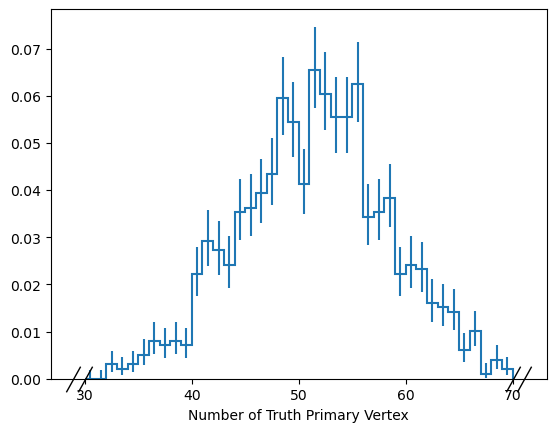

In [15]:
fig, ax = plt.subplots()
hep.histplot(hist_n_truth_PriVtx, density=True, histtype="step")
fig.savefig(output_path / "hist_n_truth_PriVtx.png")

## truth vertex vz

In [46]:
hist_truth_PriVtxZ = hist.Hist(
    hist.axis.Regular(
        101,
        -200,
        200,
        name="hist_truth_PriVtxZ",
        label="Truth Primary Vertex Z [mm]",
    )
)
hist_truth_PriVtxZ.fill(ak.flatten(ML_tracks["truth_PriVtxZ"]))

Hist(Regular(101, -200, 200, name='hist_truth_PriVtxZ', label='Truth Primary Vertex Z [mm]'), storage=Double()) # Sum: 51079.0 (51097.0 with flow)

55.88863068256245


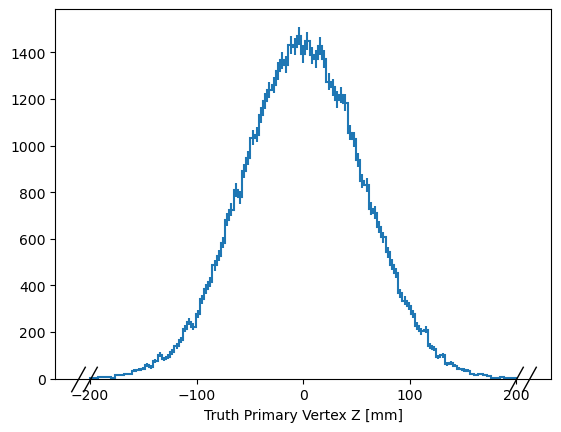

In [47]:
fig, axs = plt.subplots()
hep.histplot(hist_truth_PriVtxZ, density=False, histtype="step")
print(np.std(ak.flatten(ML_tracks["truth_PriVtxZ"])))
fig.savefig(output_path / "hist_truth_PriVtxZ.png")

# Reco Vertex distribution

## n reco vertex

In [49]:
hist_n_reco_PriVtx = hist.Hist(
    hist.axis.Regular(
        40,
        0,
        40,
        name="hist_n_reco_PriVtx",
        label="Number of Reco Primary Vertex",
    )
)
hist_n_reco_PriVtx.fill(ak.count(ML_tracks.reco_PriVtxZ, axis=1))

Hist(Regular(40, 0, 40, name='hist_n_reco_PriVtx', label='Number of Reco Primary Vertex'), storage=Double()) # Sum: 982.0 (1000.0 with flow)

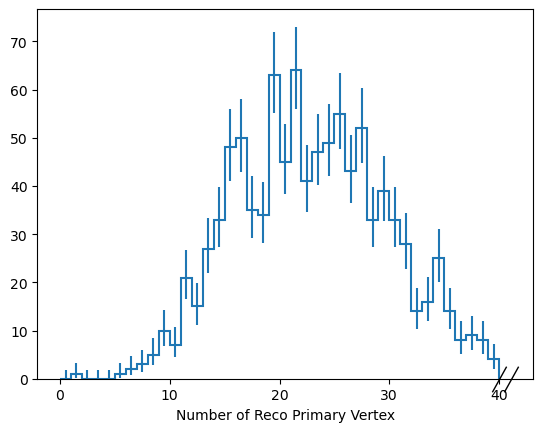

In [51]:
fig, ax = plt.subplots()
hep.histplot(hist_n_reco_PriVtx, density=False, histtype="step")
fig.savefig(output_path / "hist_n_reco_PriVtx.png")

## reco vertex vz

In [52]:
hist_reco_PriVtxZ = hist.Hist(
    hist.axis.Regular(
        101,
        -200,
        200,
        name="hist_reco_PriVtxZ",
        label="Reco Primary Vertex Z [mm]",
    )
)
hist_reco_PriVtxZ.fill(ak.flatten(ML_tracks["reco_PriVtxZ"]))

Hist(Regular(101, -200, 200, name='hist_reco_PriVtxZ', label='Reco Primary Vertex Z [mm]'), storage=Double()) # Sum: 22746.0 (22763.0 with flow)

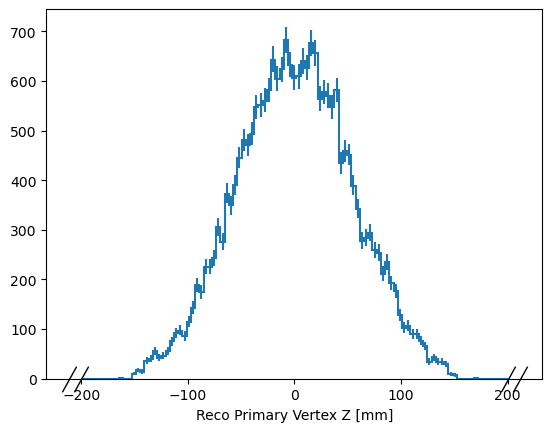

In [53]:
fig, ax = plt.subplots()
hep.histplot(hist_reco_PriVtxZ, density=False, histtype="step")
fig.savefig(output_path / "hist_reco_PriVtxZ.png")

# n reco vtx vs n truth vtx

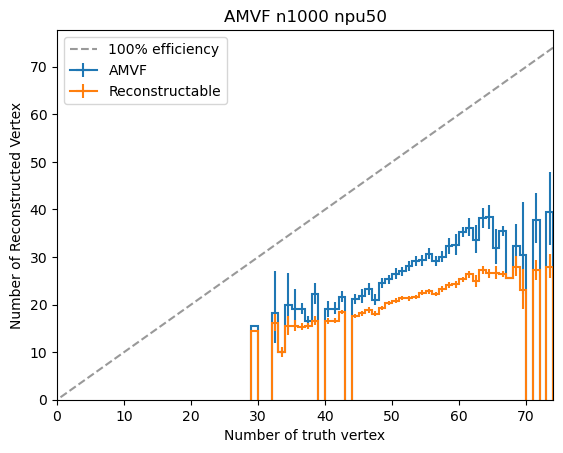

In [61]:
max_value = np.max(vertexing.nTrueVtx)

TH2_vtx_vs_pu = (
    hist.Hist.new.Reg(
        max_value,
        0,
        max_value,
        name="num_truth_vtx",
        label="Number of truth vertex",
        flow=True,
    )
    .Reg(
        max_value,
        0,
        max_value,
        name="num_reco_vtx",
        label="Number of reco vertex",
        flow=True,
    )
    .Double()
)
TH2_vtx_vs_pu.fill(vertexing.nTrueVtx, vertexing.nRecoVtx)
hprofile_truth_vs_reco = TH2_vtx_vs_pu.profile("num_reco_vtx")


TH2_reconstructable_vtx_vs_pu = (
    hist.Hist.new.Reg(
        max_value,
        0,
        max_value,
        name="num_truth_vtx",
        label="Number of truth vertex",
        flow=True,
    )
    .Reg(
        max_value,
        0,
        max_value,
        name="num_reconstructable_vtx_vs_pu",
        label="Number of reconstructable vertex",
        flow=True,
    )
    .Double()
)
TH2_reconstructable_vtx_vs_pu.fill(
    vertexing.nTrueVtx, vertexing.nVtxReconstructable
)
hprofile_reconstructable_vs_reco = TH2_reconstructable_vtx_vs_pu.profile(
    "num_reconstructable_vtx_vs_pu"
)

fig, ax = plt.subplots()
hprofile_truth_vs_reco.plot(label="AMVF")
hprofile_reconstructable_vs_reco.plot(label="Reconstructable")

# bin_values, bin_edges = hprofile.to_numpy()
# ax.stairs(bin_values,  bin_edges)
ax.set_ylabel("Number of Reconstructed Vertex")
ax.set_title("AMVF n1000 npu50")
ax.plot(
    [max_value, 0.0],
    [max_value, 0.0],
    "--",
    color=(0.6, 0.6, 0.6),
    label="100% efficiency",
)

ax.legend()
ax.set_xlim(0, max_value)
# ax.text(0.5, 0.5, f"Mean: {hprofile.values()[0]:.2f}", transform=ax.transAxes)
plt.savefig(output_path / "num_vtx_vs_pu.png")

# reco vtx diff Z

In [62]:
def calculate_differenceZ(vtx_vz: ak.highlevel.Array):
    differenceZ = []
    for vtx_vz_event in vtx_vz:
        distance_all_pairs = ak.flatten(vtx_vz_event[:, None] - vtx_vz_event)
        differenceZ.append(distance_all_pairs[distance_all_pairs != 0])

    return differenceZ

In [63]:
reco_vtx_vz = ML_tracks.reco_PriVtxZ
truth_vtx_vz = ML_tracks.truth_PriVtxZ

### Plot the reco vtx
hist_differenceZ = hist.Hist(
    hist.axis.Regular(bins=50, start=-5, stop=5, name="diffZ")
)
differenceZ = calculate_differenceZ(reco_vtx_vz)
# flatten the list
differenceZ = np.concatenate(differenceZ)
hist_differenceZ.fill(differenceZ)
# plot_hist(hist_differenceZ, output_path, output_name=f'diffZ_amvf_pu{pu_number}', pu_number = pu_number, is_truth=False)

### Plot the truth vtx
differenceZ_truth = calculate_differenceZ(truth_vtx_vz)
hist_differenceZ_truth = hist_differenceZ.copy()
hist_differenceZ_truth.reset()
differenceZ_truth = np.concatenate(differenceZ_truth)
hist_differenceZ_truth.fill(differenceZ_truth)
# plot_hist(hist_differenceZ_truth, output_path, output_name=f'diffZ_truth_pu{pu_number}', pu_number = pu_number, is_truth=True)

Hist(Regular(50, -5, 5, name='diffZ'), storage=Double()) # Sum: 131698.0 (2610474.0 with flow)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x2902a2530>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

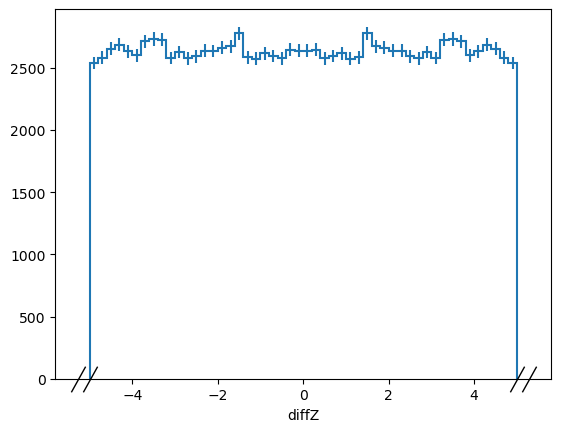

In [67]:
hep.histplot(hist_differenceZ_truth)

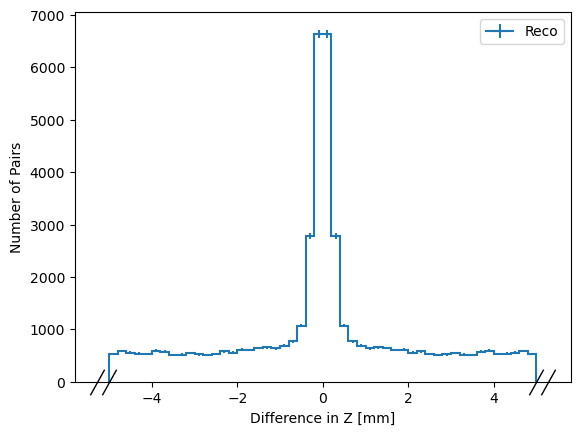

In [65]:
fig, ax = plt.subplots()

hep.histplot(hist_differenceZ, density=False, histtype="step", label="Reco")
# hep.histplot(hist_differenceZ_truth, density=False, histtype='step', label="Truth")
ax.set_xlabel("Difference in Z [mm]")
ax.set_ylabel("Number of Pairs")
ax.legend()
fig.savefig(output_path / "diffZ.png")

In [72]:
reco_vtx_vz[2]

<Array [-29.8, 30, -29.4, 5.42, ..., 38.5, 11.9, -29.4] type='15 * float32'>

In [71]:
truth_vtx_vz[2]

<Array [-29.9, -58.5, 17.4, -14.6, ..., 27.9, 32.6, 52.6] type='29 * float32'>